In [1]:
res = 128
import tensorflow as tf

C:\Users\ezioa\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
import keras

Using TensorFlow backend.


In [3]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 14129173362567928483
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 6691033579
locality {
  bus_id: 1
  links {
  }
}
incarnation: 10526572477763696676
physical_device_desc: "device: 0, name: GeForce GTX 1070, pci bus id: 0000:01:00.0, compute capability: 6.1"
]


In [4]:
import numpy as np
import pylab as pl
pl.rcParams['figure.figsize']  = 7.5, 7.5
pl.rcParams['lines.linewidth'] = 1.5
pl.rcParams['font.family']     = 'serif'
pl.rcParams['font.weight']     = 'bold'
pl.rcParams['font.size']       = 20
pl.rcParams['font.sans-serif'] = 'serif'
pl.rcParams['text.usetex']     = True
pl.rcParams['axes.linewidth']  = 1.5
pl.rcParams['axes.titlesize']  = 'medium'
pl.rcParams['axes.labelsize']  = 'medium'

pl.rcParams['xtick.major.size'] = 8
pl.rcParams['xtick.minor.size'] = 4
pl.rcParams['xtick.major.pad']  = 8
pl.rcParams['xtick.minor.pad']  = 8
pl.rcParams['xtick.color']      = 'k'
pl.rcParams['xtick.labelsize']  = 'medium'
pl.rcParams['xtick.direction']  = 'in'

pl.rcParams['ytick.major.size'] = 8
pl.rcParams['ytick.minor.size'] = 4
pl.rcParams['ytick.major.pad']  = 8
pl.rcParams['ytick.minor.pad']  = 8
pl.rcParams['ytick.color']      = 'k'
pl.rcParams['ytick.labelsize']  = 'medium'
pl.rcParams['ytick.direction']  = 'in'

In [5]:

import scipy.io as sio

In [6]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# from tqdm import tqdm

import math
from sklearn.model_selection import train_test_split
from sklearn import metrics

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation, GRU, Conv1D,SimpleRNN
from keras.layers import Bidirectional, GlobalMaxPool1D
from keras.models import Model, Sequential

In [7]:
mat_contents = sio.loadmat('XTrain.mat')
XTrain = mat_contents['XTrain']
mat_contents = sio.loadmat('YTrain.mat')
YTrain = mat_contents['YTrain'] 
mat_contents = sio.loadmat('YTest.mat')
YTest = mat_contents['YTest']
mat_contents = sio.loadmat('XTest.mat')
XTest = mat_contents['XTest']

In [8]:
YTrain[YTrain == 10]=0
YTrain[YTrain == 30]=1

YTest[YTest == 10]=0
YTest[YTest == 30]=1

In [9]:
XTrain = XTrain/255
XTest = XTest/255

In [10]:
XTrain.shape

(163132, 27)

In [11]:
XTest.shape

(1579808, 27)

In [12]:
unique, counts = np.unique(( YTest ), return_counts=True)

In [13]:
counts[0]/counts[1]

0.9370552201399753

In [14]:
model = Sequential()
model.add(Dense(256, input_shape = (27,), activation = 'relu' ))
model.add(Dropout(0.3))
model.add(Dense(128, activation = 'relu' ))
model.add(Dropout(0.3))
model.add(Dense(128, activation = 'relu' ))

model.add(Dense(2, activation = 'softmax' ))
model.add(Dropout(0.3))

In [15]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [16]:
model.fit(XTrain, YTrain,validation_data = (XTest, YTest), batch_size= 1000, epochs = 2, verbose =2 )

Train on 163132 samples, validate on 1579808 samples
Epoch 1/2
 - 3s - loss: 2.1905 - acc: 0.6794 - val_loss: 3.2884 - val_acc: 0.7579
Epoch 2/2
 - 2s - loss: 1.6145 - acc: 0.6977 - val_loss: 2.6915 - val_acc: 0.7957


In [17]:
pred_noemb_val_y_class = model.predict_classes(XTest, batch_size=1024, verbose=1)

1579808/1579808 [==============================] - 1s 1us/step


In [18]:
metrics.accuracy_score(YTest, pred_noemb_val_y_class)

0.7957036551277117

In [19]:
from keras.models import load_model

model.save('ANN.h5')  # creates a HDF5 file 'my_model.h5'
del model  # deletes the existing model

# returns a compiled model
# identical to the previous one
model = load_model('ANN.h5')

In [20]:
images = dir('../imgs/')
masks = dir('../masks/')

In [21]:
error_ANN = np.zeros(251)

In [22]:
def predict_transform(predicted):
            
        
    predicted[predicted==0] = 10
    predicted[predicted==1] = 30
    c = np.zeros((res*res))
    c[i] = predicted
    predicted_reshaped = c.reshape((res, res))
    
    return predicted_reshaped, c

In [23]:
import os
import glob
img_dir = "../imgs/" # Enter Directory of all images 
img_dir2 = "../masks/"
data_path = os.path.join(img_dir,'*g')
files = glob.glob(data_path)

data_path2 = os.path.join(img_dir2,'*g')
files2 = glob.glob(data_path2)

training_set = np.array([6, 9, 14, 22, 28, 35, 36, 40, 57, 66, 80, 85, 89, 104, 122, 128, 159, 172, 190, 230, 231, 242, 249])
data = []
z = 0
for f1 in files:
    
    blah = pl.imread(files2[z])
    z = z+1
#     if z not in training_set:
    print(z)
    test = pl.imread(f1)

    file_dir = 'all_images_converted_patch_mat33/' + str(z)+ '.mat' 

    a = sio.loadmat(file_dir)
    a= a['temp']
    a = a / 255
    find_non_zero = np.sum(a, 1)

    i = np.where( find_non_zero>0)

    b =a[i, :]

    b = b.reshape((b.shape[1], b.shape[2]))

    predicted_ann = model.predict_classes(b, batch_size=1024, verbose=1)


    predicted_ann,c1 = predict_transform(predicted_ann)



    file_dir = 'all_images_converted_patch_Y/' + str(z)+ '.mat' 

    ycheck = sio.loadmat(file_dir)
    ycheck= ycheck['test']


    error_ANN[z-1] = (metrics.accuracy_score(ycheck[i], c1[i]) )


1
6658/6658 [==============================] - 0s 8us/step
2
6935/6935 [==============================] - 0s 1us/step
3
7894/7894 [==============================] - 0s 1us/step
4
7752/7752 [==============================] - 0s 1us/step
5
6947/6947 [==============================] - 0s 1us/step
6
6789/6789 [==============================] - 0s 1us/step
7
6345/6345 [==============================] - 0s 1us/step
8
6745/6745 [==============================] - 0s 1us/step
9
7183/7183 [==============================] - 0s 1us/step
10
7102/7102 [==============================] - 0s 1us/step
11
7424/7424 [==============================] - 0s 1us/step
12
6456/6456 [==============================] - 0s 1us/step
13
6559/6559 [==============================] - 0s 1us/step
14
6079/6079 [==============================] - 0s 1us/step
15
7105/7105 [==============================] - 0s 1us/step
16
6967/6967 [==============================] - 0s 1us/step
17
6053/6053 [==============================] - 0

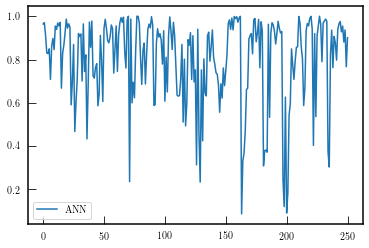

<Figure size 432x288 with 0 Axes>

In [24]:
pl.plot(error_ANN, label = 'ANN')
pl.legend()
pl.show()
pl.clf()

In [25]:
xax = [1]
error = [np.mean(error_ANN)]
stde = [np.std(error_ANN)]

In [26]:
error

[0.8017356321330091]

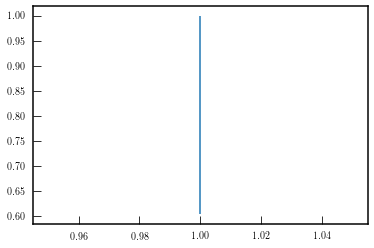

<Figure size 432x288 with 0 Axes>

In [27]:
pl.errorbar(xax, error, stde)
pl.show()
pl.clf()

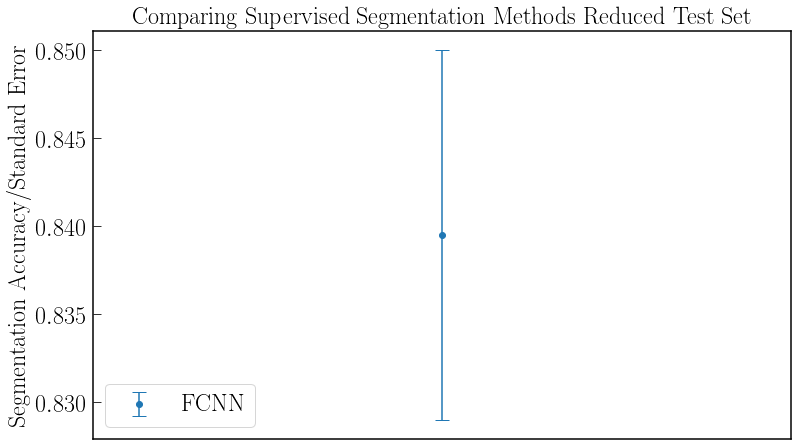

<Figure size 900x540 with 0 Axes>

In [28]:
testSet = []
for i in range(1, 252):
    if i not in np.array([6, 9, 14, 22, 28, 35, 36, 40, 57, 66, 80, 85, 89, 104, 122, 128, 159, 172, 190, 230, 231, 242, 249,\
    16, 24, 27, 46, 68, 69, 72, 76, 115, 116, 127, 132, 143, 164, 165,  182, 183, 184, 185, 198, 199, 201, 202, 203, 214, 235, 236, \
         237]):
        testSet.append(i)

testSet = np.array(testSet)

errorTest = [np.mean(error_ANN[testSet - 1])]
stdeTest = [np.std(error_ANN[testSet - 1])/np.sqrt(len(testSet))]

pl.rcParams['figure.figsize']  = 12.5, 7.5
pl.rcParams['lines.linewidth'] = 1.5
pl.rcParams['font.family']     = 'serif'
pl.rcParams['font.weight']     = 'bold'
pl.rcParams['font.size']       = 24
pl.rcParams['font.sans-serif'] = 'serif'
pl.rcParams['text.usetex']     = True
pl.rcParams['axes.linewidth']  = 1.5
pl.rcParams['axes.titlesize']  = 'medium'
pl.rcParams['axes.labelsize']  = 'medium'

pl.rcParams['xtick.major.size'] = 8
pl.rcParams['xtick.minor.size'] = 4
pl.rcParams['xtick.major.pad']  = 8
pl.rcParams['xtick.minor.pad']  = 8
pl.rcParams['xtick.color']      = 'k'
pl.rcParams['xtick.labelsize']  = 'medium'
pl.rcParams['xtick.direction']  = 'in'

pl.rcParams['ytick.major.size'] = 8
pl.rcParams['ytick.minor.size'] = 4
pl.rcParams['ytick.major.pad']  = 8
pl.rcParams['ytick.minor.pad']  = 8
pl.rcParams['ytick.color']      = 'k'
pl.rcParams['ytick.labelsize']  = 'medium'
pl.rcParams['ytick.direction']  = 'in'
pl.rcParams['errorbar.capsize'] = 7
pl.errorbar(xax[0], errorTest[0], stdeTest[0], label='FCNN', fmt='o', barsabove=True)
pl.legend(loc ='lower left')
pl.xticks([])
pl.ylabel('Segmentation Accuracy/Standard Error')
pl.title('Comparing Supervised Segmentation Methods Reduced Test Set')
pl.show()
pl.clf()

In [29]:
errorTest[0], stdeTest[0]

(0.8395035187283206, 0.01051395413200535)

In [30]:
badset = [16, 24, 27, 46, 68, 69, 72, 76, 115, 116, 127, 132, 143, 164, 165,  182, 183, 184, 185, 198, 199, 201, 202, 203, 214, 235, 236, \
         237 ]

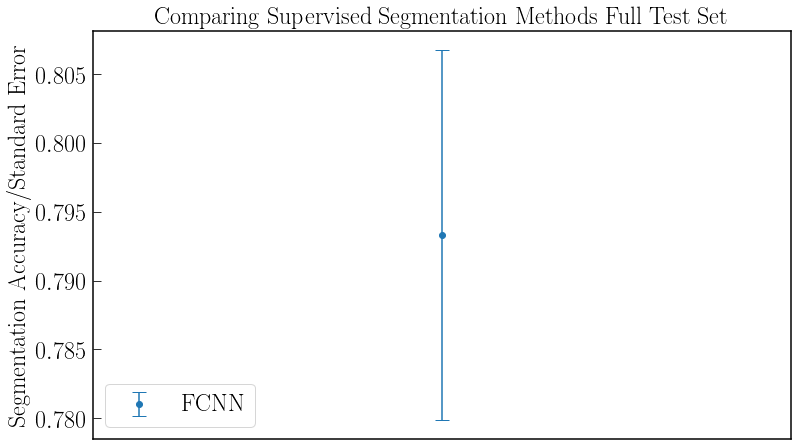

<Figure size 900x540 with 0 Axes>

In [31]:
testSet = []
for i in range(1, 252):
    if i not in np.array([6, 9, 14, 22, 28, 35, 36, 40, 57, 66, 80, 85, 89, 104, 122, 128, 159, 172, 190, 230, 231, 242, 249]):
        testSet.append(i)

testSet = np.array(testSet)

errorTest = [np.mean(error_ANN[testSet - 1])]
stdeTest = [np.std(error_ANN[testSet - 1])/np.sqrt(len(testSet))]

pl.rcParams['figure.figsize']  = 12.5, 7.5
pl.rcParams['lines.linewidth'] = 1.5
pl.rcParams['font.family']     = 'serif'
pl.rcParams['font.weight']     = 'bold'
pl.rcParams['font.size']       = 24
pl.rcParams['font.sans-serif'] = 'serif'
pl.rcParams['text.usetex']     = True
pl.rcParams['axes.linewidth']  = 1.5
pl.rcParams['axes.titlesize']  = 'medium'
pl.rcParams['axes.labelsize']  = 'medium'

pl.rcParams['xtick.major.size'] = 8
pl.rcParams['xtick.minor.size'] = 4
pl.rcParams['xtick.major.pad']  = 8
pl.rcParams['xtick.minor.pad']  = 8
pl.rcParams['xtick.color']      = 'k'
pl.rcParams['xtick.labelsize']  = 'medium'
pl.rcParams['xtick.direction']  = 'in'

pl.rcParams['ytick.major.size'] = 8
pl.rcParams['ytick.minor.size'] = 4
pl.rcParams['ytick.major.pad']  = 8
pl.rcParams['ytick.minor.pad']  = 8
pl.rcParams['ytick.color']      = 'k'
pl.rcParams['ytick.labelsize']  = 'medium'
pl.rcParams['ytick.direction']  = 'in'
pl.rcParams['errorbar.capsize'] = 7
pl.errorbar(xax[0], errorTest[0], stdeTest[0], label='FCNN', fmt='o', barsabove=True)
pl.legend(loc ='lower left')
pl.xticks([])
pl.ylabel('Segmentation Accuracy/Standard Error')
pl.title('Comparing Supervised Segmentation Methods Full Test Set')
pl.show()
pl.clf()

In [32]:
errorTest[0], stdeTest[0]

(0.793310153465402, 0.0134561013068123)

In [33]:
len(badset)

28

4
7752/7752 [==============================] - 0s 1us/step


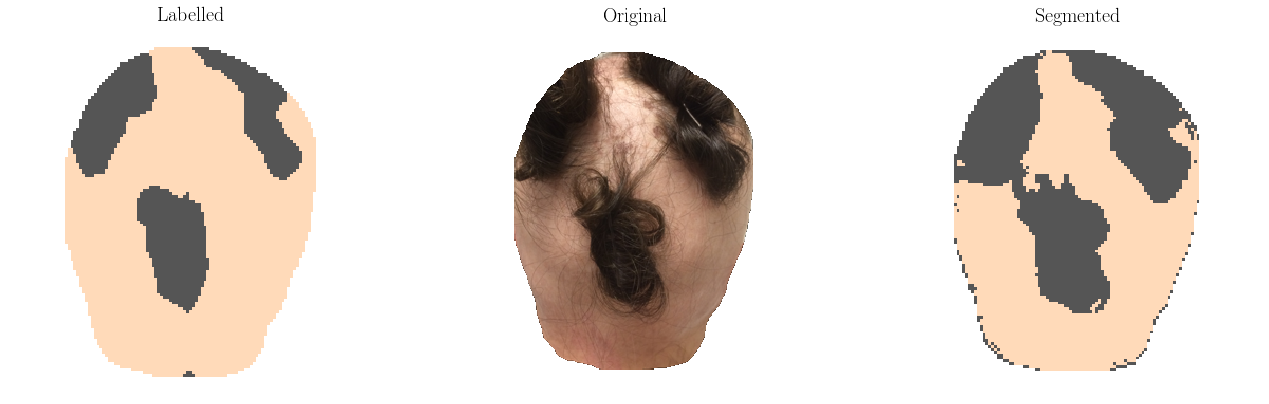

<Figure size 1620x540 with 0 Axes>

In [34]:
import os
import glob
img_dir = "../imgs/" # Enter Directory of all images 
img_dir2 = "../masks/"
data_path = os.path.join(img_dir,'*g')
files = glob.glob(data_path)

data_path2 = os.path.join(img_dir2,'*g')
files2 = glob.glob(data_path2)

training_set = np.array([6, 9, 14, 22, 28, 35, 36, 40, 57, 66, 80, 85, 89, 104, 122, 128, 159, 172, 190, 230, 231, 242, 249])
data = []
z = 0
for f1 in files:
    
    blah = pl.imread(files2[z])
    z = z+1
    
    if z == 4:
        print(z)

        test = pl.imread(f1)

        file_dir = 'all_images_converted_patch_mat33/' + str(z)+ '.mat' 

        a = sio.loadmat(file_dir)
        a= a['temp']
        a = a / 255
        find_non_zero = np.sum(a, 1)

        i = np.where( find_non_zero>0)

        b =a[i, :]

        b = b.reshape((b.shape[1], b.shape[2]))

        predicted_ann = model.predict_classes(b, batch_size=1024, verbose=1)


        predicted_ann,c1 = predict_transform(predicted_ann)



        file_dir = 'all_images_converted_patch_Y/' + str(z)+ '.mat' 

        ycheck = sio.loadmat(file_dir)
        ycheck= ycheck['test']


        error_ANN[z-1] = (metrics.accuracy_score(ycheck[i], c1[i]) )
        
        from matplotlib.colors import LinearSegmentedColormap
        pl.rcParams['figure.figsize']  = 22.5, 7.5
        pl.rcParams['lines.linewidth'] = 1.5
        pl.rcParams['font.family']     = 'serif'
        pl.rcParams['font.weight']     = 'bold'
        pl.rcParams['font.size']       = 20
        pl.rcParams['font.sans-serif'] = 'serif'
        pl.rcParams['text.usetex']     = True
        pl.rcParams['axes.linewidth']  = 1.5
        pl.rcParams['axes.titlesize']  = 'medium'
        pl.rcParams['axes.labelsize']  = 'medium'

        pl.rcParams['xtick.major.size'] = 8
        pl.rcParams['xtick.minor.size'] = 4
        pl.rcParams['xtick.major.pad']  = 8
        pl.rcParams['xtick.minor.pad']  = 8
        pl.rcParams['xtick.color']      = 'k'
        pl.rcParams['xtick.labelsize']  = 'medium'
        pl.rcParams['xtick.direction']  = 'in'

        pl.rcParams['ytick.major.size'] = 8
        pl.rcParams['ytick.minor.size'] = 4
        pl.rcParams['ytick.major.pad']  = 8
        pl.rcParams['ytick.minor.pad']  = 8
        pl.rcParams['ytick.color']      = 'k'
        pl.rcParams['ytick.labelsize']  = 'medium'
        pl.rcParams['ytick.direction']  = 'in'
        cmap = LinearSegmentedColormap.from_list('mycmap', ['white', 'black', 'peachpuff'])
        
        pl.subplot(1,3,1)
        pl.axis('off')
        pl.imshow(ycheck.reshape(res,res).T, cmap=cmap)
        pl.xticks([])
        pl.yticks([])
        pl.axis('off')
        pl.title('Labelled')
        
        pl.subplot(1,3,2)
        pl.imshow(test, cmap=cmap)
        pl.axis('off')

        pl.xticks([])
        pl.yticks([])
        pl.title('Original')
        
        pl.subplot(1,3,3)
        pl.imshow(predicted_ann.T, cmap=cmap)
        pl.axis('off')
        pl.title('Segmented')
        pl.xticks([])
        pl.yticks([])
        pl.show()
        pl.clf()   
